# Decision Tree Tutorial

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('car_evaluation.csv')
df.head()

vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc

# EDA and Feature Engineering

In [4]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [5]:
df.head()

buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    med  unacc
1  vhigh  vhigh     2       2    small   high  unacc
2  vhigh  vhigh     2       2      med    low  unacc
3  vhigh  vhigh     2       2      med    med  unacc
4  vhigh  vhigh     2       2      med   high  unacc

In [6]:
X = df.drop(['class'],axis = 1)
y = df['class']

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

x_train.shape,x_test.shape

((1381, 6), (346, 6))

In [10]:
import category_encoders as ce

In [11]:
encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

# Decision Tree Classifier with criterion gini index

In [28]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [29]:
y_pred_gini = clf_gini.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7688


In [33]:
y_pred_train_gini = clf_gini.predict(x_train)

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.7922


In [35]:
print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 0.7922
Test set score: 0.7688


[Text(0.3333333333333333, 0.875, 'X[5] <= 1.5\ngini = 0.452\nsamples = 1381\nvalue = [307, 54, 972, 48]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 467\nvalue = [0, 0, 467, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.5\ngini = 0.576\nsamples = 914\nvalue = [307, 54, 505, 48]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 299\nvalue = [0, 0, 299, 0]'),
 Text(0.6666666666666666, 0.375, 'X[1] <= 2.5\ngini = 0.625\nsamples = 615\nvalue = [307, 54, 206, 48]'),
 Text(0.5, 0.125, 'gini = 0.523\nsamples = 301\nvalue = [136, 0, 157, 8]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.633\nsamples = 314\nvalue = [171, 54, 49, 40]')]

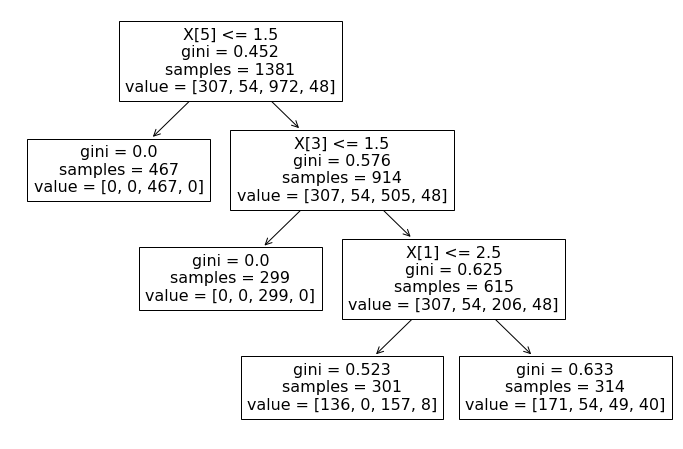

In [37]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(x_train, y_train)) 

# Decision Tree with Criterion entropy

In [40]:
clf_en = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)

clf_en.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [42]:
y_pred_en = clf_en.predict(x_test)
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7688


In [43]:
y_pred_train_en = clf_en.predict(x_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7922


[Text(0.3333333333333333, 0.875, 'X[5] <= 1.5\nentropy = 1.19\nsamples = 1381\nvalue = [307, 54, 972, 48]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 467\nvalue = [0, 0, 467, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.5\nentropy = 1.466\nsamples = 914\nvalue = [307, 54, 505, 48]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 299\nvalue = [0, 0, 299, 0]'),
 Text(0.6666666666666666, 0.375, 'X[1] <= 2.5\nentropy = 1.624\nsamples = 615\nvalue = [307, 54, 206, 48]'),
 Text(0.5, 0.125, 'entropy = 1.147\nsamples = 301\nvalue = [136, 0, 157, 8]'),
 Text(0.8333333333333334, 0.125, 'entropy = 1.711\nsamples = 314\nvalue = [171, 54, 49, 40]')]

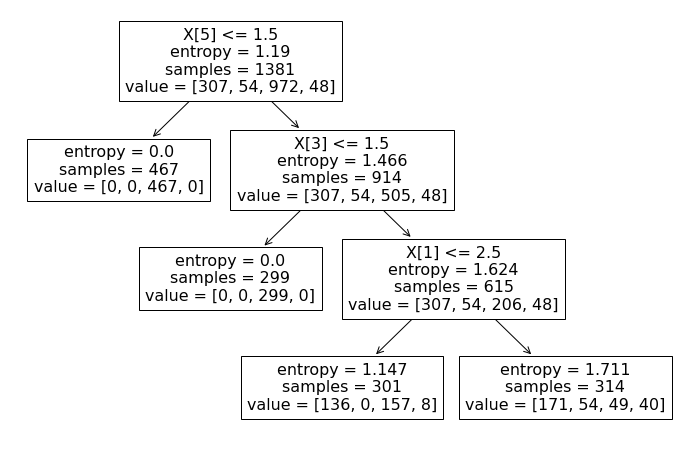

In [45]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(x_train, y_train)) 

# Confusion Matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [46]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 36   0  41   0]
 [ 15   0   0   0]
 [  7   0 230   0]
 [ 12   0   5   0]]


# Classification Report

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.51      0.47      0.49        77
        good       0.00      0.00      0.00        15
       unacc       0.83      0.97      0.90       237
       vgood       0.00      0.00      0.00        17

    accuracy                           0.77       346
   macro avg       0.34      0.36      0.35       346
weighted avg       0.69      0.77      0.72       346

